In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats

import librosa

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
directory = "prototypes/"

data = []

for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        parts = filename.split('_')
        genre = parts[1]

        file_path = os.path.join(directory, filename)
        y, sr = librosa.load(file_path, sr=22050)

        # Zero Crossing Rate
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))

        # Spectral Features
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))

        # MFCCs
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)

        data.append({
            'name': filename, 
            'genre': genre,
            'zcr': zcr,
            'spectral_centroid': spectral_centroid,
            'spectral_rolloff': spectral_rolloff,
            'spectral_bandwidth': spectral_bandwidth,
            'spectral_flatness': spectral_flatness,
            **{f'mfcc_{i}': mfcc for i, mfcc in enumerate(mfccs)}
        })


audio = pd.DataFrame(data)

In [ ]:
def print_grouped_stats(audio, column_name):    
    grouped_data = audio.groupby('genre')[column_name].agg(['mean', 'std'])
    
    print(f"Mean and Standard Deviation of '{column_name}' by Genre:")
    print(grouped_data)

print_grouped_stats(audio, "spectral_centroid")
print_grouped_stats(audio, "spectral_rolloff")
print_grouped_stats(audio, "spectral_bandwidth")
print_grouped_stats(audio, "spectral_flatness")

In [3]:
custom_colors = ['#3E57C1', '#A25A00', '#B6B6B6', '#B533FF', '#27D86C', 
                 '#EFCB10', '#EA1F15', '#FC00FF', '#3CC3B3', '#010504']
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the distribution of ZCR for each genre
kdeplot = sns.kdeplot(data=audio, x='zcr', hue='genre', fill=True, common_norm=False, hue_order=genres, palette=custom_colors, alpha=0.3)

# Set the titles and labels
plt.title('Distribution of Zero Crossing Rate by Genre', fontsize=16)
plt.xlabel('Zero Crossing Rate', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

Kruskal-Wallis on spectral_centroid: H-statistic=63.92521527281889, p-value=2.3337053173714957e-10
Kruskal-Wallis on spectral_rolloff: H-statistic=66.20831808171667, p-value=8.392800351177834e-11
Kruskal-Wallis on spectral_bandwidth: H-statistic=58.49500447047391, p-value=2.6114493180553997e-09
Kruskal-Wallis on spectral_flatness: H-statistic=66.00633667168717, p-value=9.189012794219437e-11
Kruskal-Wallis on zcr: H-statistic=58.55155926528217, p-value=2.546931077073456e-09


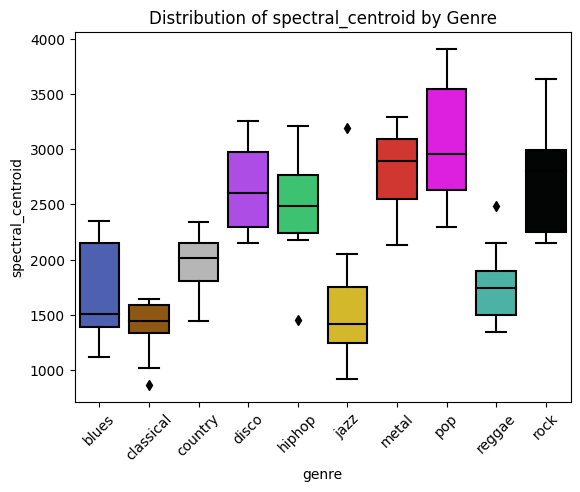

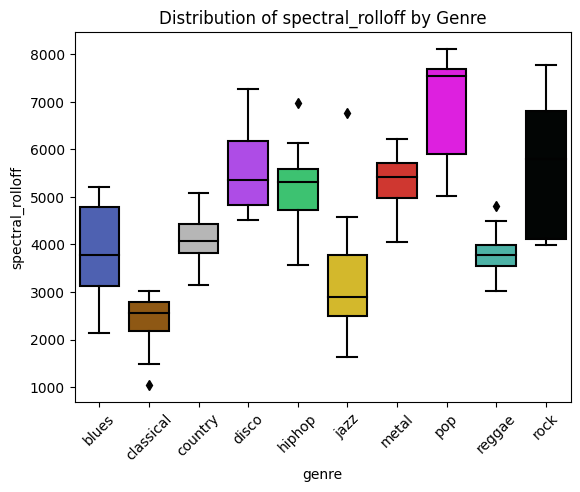

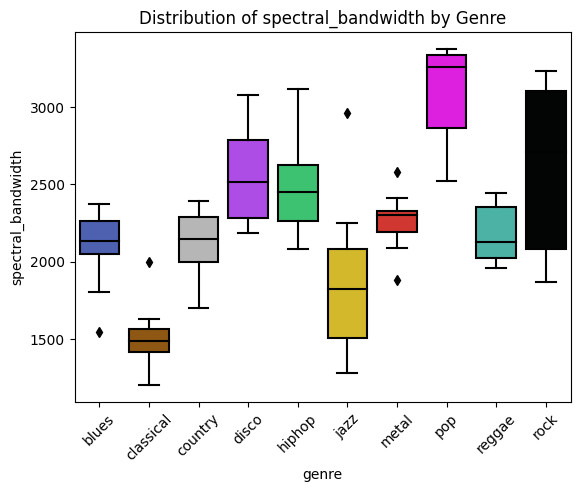

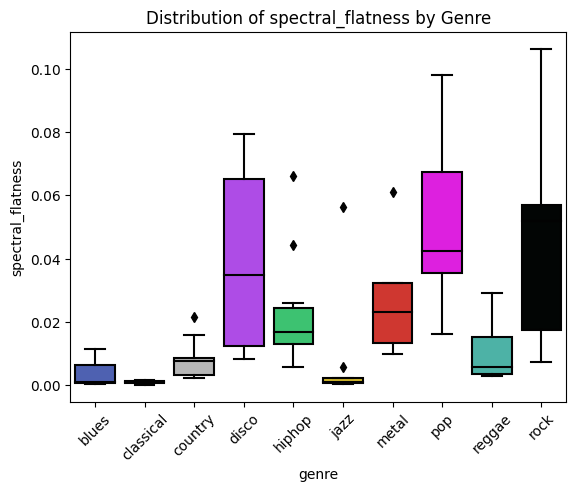

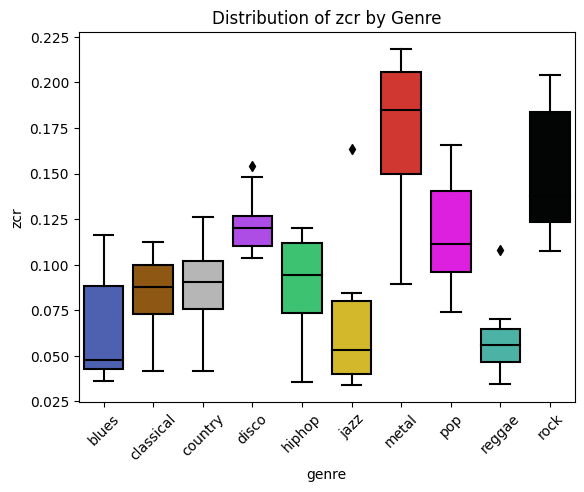

In [18]:
# Check for normality and homogeneity of variances for each genre and variable
for col in ['spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth', 'spectral_flatness', 'zcr']:
    k_stat, k_p = stats.kruskal(*[audio[audio['genre'] == genre][col] for genre in genres])
    print(f"Kruskal-Wallis on {col}: H-statistic={k_stat}, p-value={k_p}")

names = ["Spectral Centroid", "Spectral Runoff", "Spectral Bandwidth", "Spectral Flatness", "Zero Crossing Rate"]

# Visualization
for i, col in enumerate(['spectral_centroid', 'spectral_rolloff', 'spectral_bandwidth', 'spectral_flatness', 'zcr']):
    sns.boxplot(x='genre', y=col, order=genres, hue_order=genres, palette=custom_colors, data=audio)
    plt.title(f"Distribution of {col} by Genre")
    plt.xticks(rotation=45)
    plt.show()